In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
#Load Dataset
df = pd.read_csv("Beverage_Sales_Data.csv")

In [ ]:
#Initial Inspection
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())

  Order_ID Customer_ID Customer_Type             Product     Category  \
0     ORD1     CUS1496           B2B          Vio Wasser        Water   
1     ORD1     CUS1496           B2B               Evian        Water   
2     ORD1     CUS1496           B2B              Sprite  Soft Drinks   
3     ORD1     CUS1496           B2B  Rauch Multivitamin       Juices   
4     ORD1     CUS1496           B2B        Gerolsteiner        Water   

   Unit_Price  Quantity  Discount  Total_Price             Region  Order_Date  
0        1.66      53.0      0.10        79.18  Baden-Württemberg  2023-08-23  
1        1.56      90.0      0.10       126.36  Baden-Württemberg  2023-08-23  
2        1.17      73.0      0.05        81.14  Baden-Württemberg  2023-08-23  
3        3.22      59.0      0.10       170.98  Baden-Württemberg  2023-08-23  
4        0.87      35.0      0.10        27.40  Baden-Württemberg  2023-08-23  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605798 entries, 0 to 605797
Dat

In [ ]:
#Data Cleaning & Preparation
# Convert date column
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

In [ ]:
#Create time features
df["Year"] = df["Order_Date"].dt.year
df["Month"] = df["Order_Date"].dt.month
df["Quarter"] = df["Order_Date"].dt.quarter

In [ ]:
#Ensure numeric fields are correct
num_cols = ["Unit_Price", "Quantity", "Discount", "Total_Price"]
df[num_cols] = df[num_cols].apply(pd.to_numeric)

In [ ]:
#Data Validation: Check Total_Price
df["Check_Total"] = df["Unit_Price"] * df["Quantity"] * (1 - df["Discount"])
df["Diff"] = df["Total_Price"] - df["Check_Total"]

print("Total difference:", df["Diff"].sum())
print("Max row difference:", df["Diff"].abs().max())

Total difference: -6.91199999976338
Max row difference: 0.005000000001018634


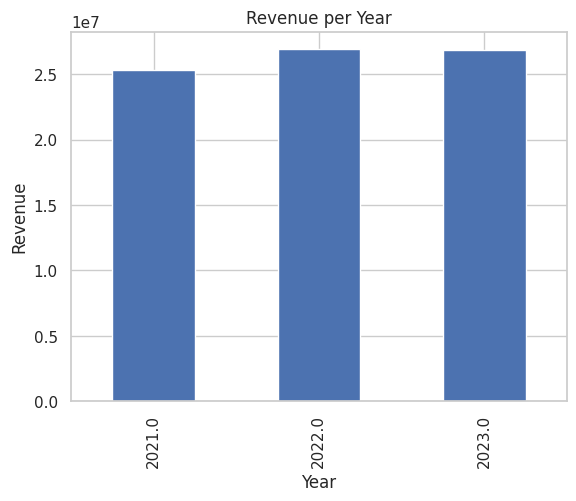

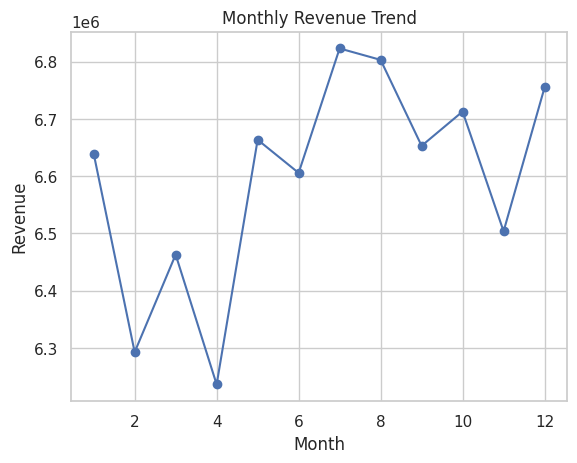

In [ ]:
#BUSINESS ANALYSIS
#Revenue Over Time
rev_year = df.groupby("Year")["Total_Price"].sum()
rev_month = df.groupby("Month")["Total_Price"].sum()

rev_year.plot(kind="bar", title="Revenue per Year")
plt.ylabel("Revenue")
plt.show()

rev_month.plot(kind="line", marker="o", title="Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

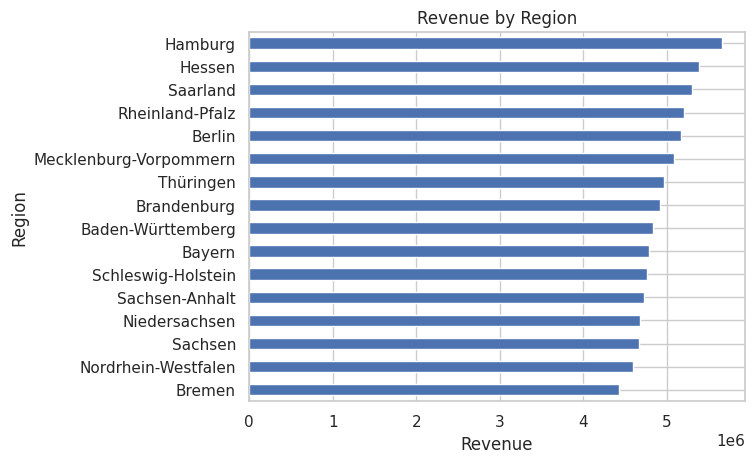

In [ ]:
#Revenue by Region
rev_region = df.groupby("Region")["Total_Price"].sum().sort_values()

rev_region.plot(kind="barh", title="Revenue by Region")
plt.xlabel("Revenue")
plt.show()

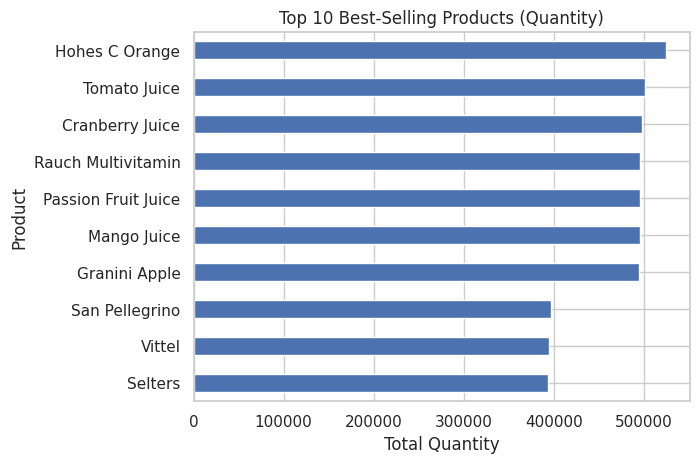

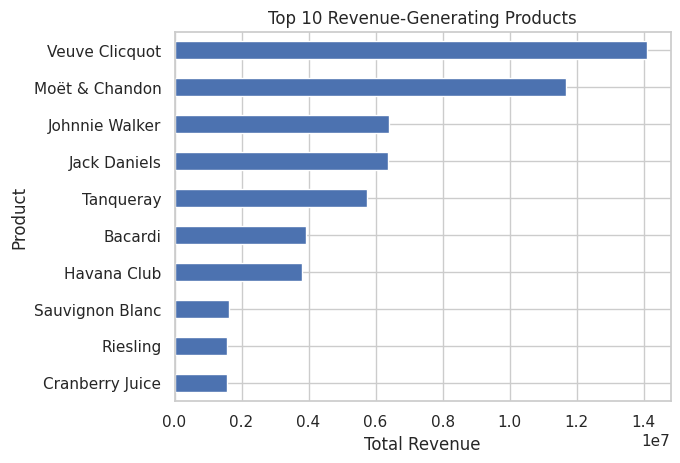

In [ ]:
#Top Products (Quantity & Revenue)
top_qty = df.groupby("Product")["Quantity"].sum().sort_values().tail(10)
top_rev = df.groupby("Product")["Total_Price"].sum().sort_values().tail(10)

top_qty.plot(kind="barh", title="Top 10 Best-Selling Products (Quantity)")
plt.xlabel("Total Quantity")
plt.show()

top_rev.plot(kind="barh", title="Top 10 Revenue-Generating Products")
plt.xlabel("Total Revenue")
plt.show()

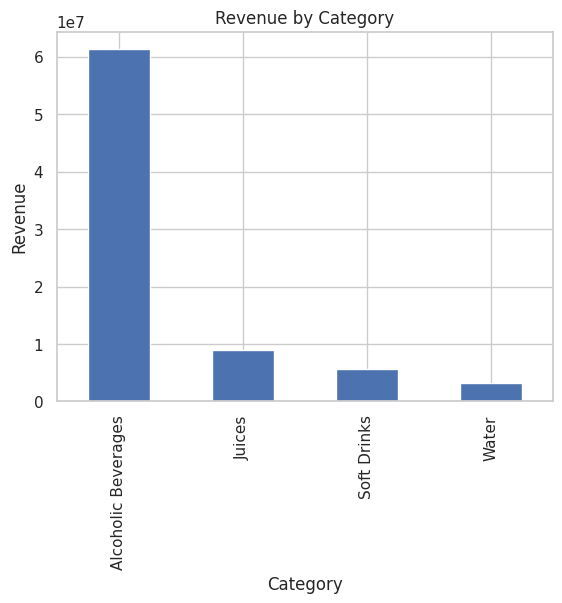

In [ ]:
#Category Analysis
rev_category = df.groupby("Category")["Total_Price"].sum()

rev_category.plot(kind="bar", title="Revenue by Category")
plt.ylabel("Revenue")
plt.show()

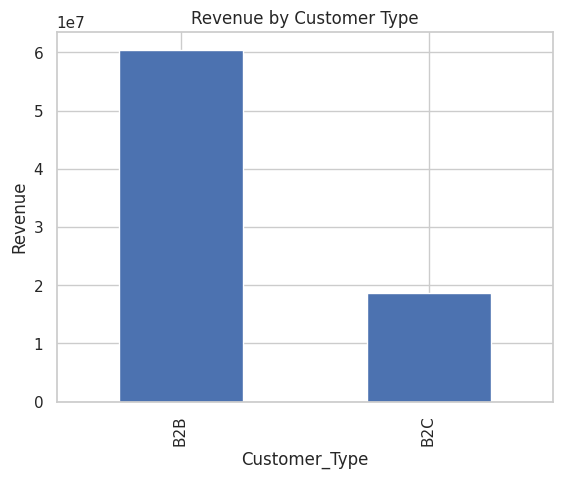

In [ ]:
#Customer Analysis (B2B vs B2C)
#Revenue comparison
df.groupby("Customer_Type")["Total_Price"].sum().plot(kind="bar", title="Revenue by Customer Type")
plt.ylabel("Revenue")
plt.show()

In [ ]:
#Average Order Value (AOV)
aov = df.groupby("Customer_Type")["Total_Price"].mean()
print("Average Order Value:\n", aov)

Average Order Value:
 Customer_Type
B2B    280.480237
B2C     47.777892
Name: Total_Price, dtype: float64


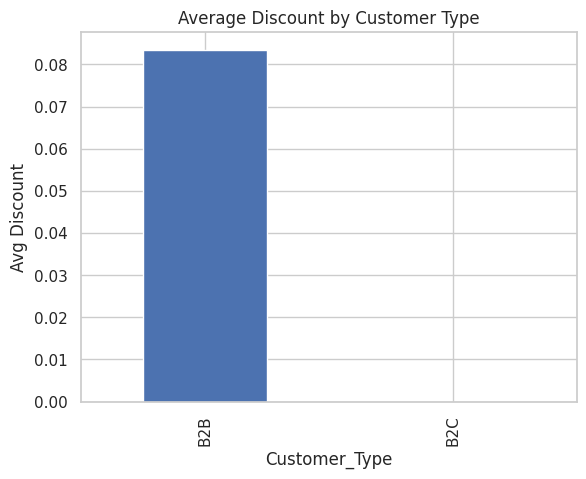

In [ ]:
#Discount Analysis
#Discount usage by customer type
df.groupby("Customer_Type")["Discount"].mean().plot(kind="bar", title="Average Discount by Customer Type")
plt.ylabel("Avg Discount")
plt.show()

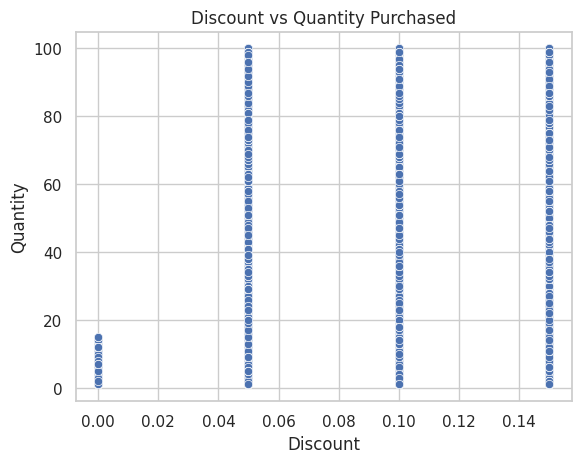

In [ ]:
#Does discount increase quantity?
sns.scatterplot(data=df, x="Discount", y="Quantity")
plt.title("Discount vs Quantity Purchased")
plt.show()

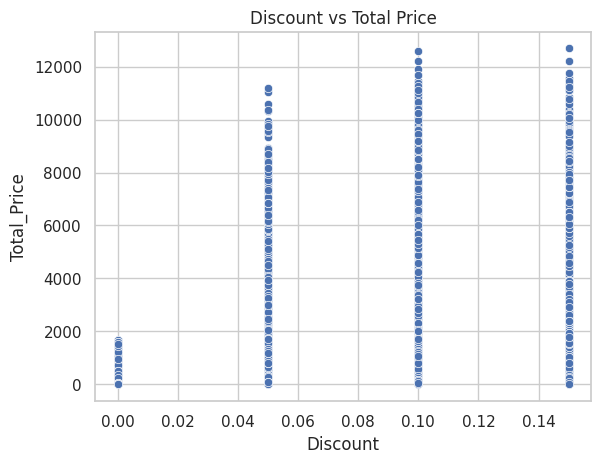

In [ ]:
#Discount impact on revenue
sns.scatterplot(data=df, x="Discount", y="Total_Price")
plt.title("Discount vs Total Price")
plt.show()

**📊 Beverage Sales Performance Analysis**

<p align="justify">
This report presents a comprehensive analysis of beverage sales performance based on a dataset covering multiple product categories, customer segments, and regional markets. The charts provided to observe yearly and monthly revenue trends, regional distribution of sales, product-level performance, and the impact of discounts on purchasing behavior.
</p>
<p align="justify">
Through this narrative, each chart is interpreted in highlighting key findings, patterns, potential risks, and strategic opportunities for business optimization.
</p>

**1. Yearly Revenue Trend**

<p align="justify">
The yearly revenue chart shows a steady upward trajectory across the three years analyzed (2021-2023). Revenue increases from roughly ~ €23 million in 2021 to almost ~ €25 million in 2023, reflecting consistent year over year growth. This pattern suggests stable market demand and effective sales operations. However, the rate of growth between 2022 and 2023 appears to flatten slightly, indicating that while the business is expanding, the pace may be slowing. This could imply market saturation, stronger competition, or limited product innovation. Continuous monitoring of growth velocity is necessary to anticipate potential plateaus.
</p>

**2. Monthly Revenue Trend**

<p align="justify">
The monthly revenue trend shows noticeable fluctuations. The year starts strong in January, dips in February and April, then rises sharply in June and July, reaching its peak around mid year. Toward the end of the year, especially September to November, the revenue shows moderate variations but stabilizes before climbing again in December.
</p>
<p align="justify">
This pattern suggests seasonality in customer purchasing behavior possibly influenced by holidays, weather, or regional preferences. The mid year peak could align with summer demand for beverages, while the year end lift may reflect holiday related consumption. Understanding these patterns helps guide inventory planning and targeted promotional campaigns.
</p>

**3. Revenue by Region**

<p align="justify">
The regional revenue distribution indicates that Hamburg is the strongest market, generating the highest revenue among all regions. Hessen and Saarland follow closely behind, suggesting that these regions have a strong customer base or more active business accounts. Lower performing regions, such as Bremen and Nordrhein-Westfalen, still generate substantial revenue but may suffer from stiffer competition or lower market penetration.
</p>
<p align="justify">
This insight highlights where the company could invest in regional marketing, expand partnerships, or optimize distribution networks. High performing regions may benefit from exclusive product offerings or loyalty programs, while lower-performing regions may require targeted campaigns to stimulate demand.
</p>

**4. Top 10 Best Selling Products (Quantity)**

<p align="justify">
The quantity based ranking shows that Hohes C Orange is the most frequently purchased product, followed closely by Tomato Juice, Cranberry Juice, and Passion Fruit Juice. The top selling items are primarily juice based products, indicating strong consumer preference for healthier or natural beverage options.
</p>
<p align="justify">
Interestingly, highly consumed items do not necessarily generate the highest revenue, signaling that their price points may be lower or heavily discounted. This insight can support packaging innovations, upselling strategies, or premium product variations to improve profitability.
</p>

**5. Top Revenue Generating Products**

<p align="justify">
In contrast to the quantity ranking, revenue leaders include premium alcoholic beverages such as Veuve Clicquot, Moët & Chandon, Johnnie Walker, and Jack Daniels. These products command significantly higher price points, resulting in outsized revenue contributions even at lower sales volumes.
</p>
<p align="justify">
This signals that the premium alcohol category plays a crucial role in the company’s profit structure. Maintaining strong supplier relations, ensuring product availability, and offering selective promotions can maximize returns. At the same time, this highlights the importance of balanced inventory premium items depend heavily on consistent stock and targeted marketing.
<p align="justify">

**6. Revenue by Category**

<p align="justify">
Category level analysis reveals that Alcoholic Beverages dominate revenue, contributing more than ~ €60 million, far surpassing Juices, Soft Drinks, and Water. Juices come second, generating under ~ €10 million, while Soft Drinks and Water contribute significantly lower amounts.
</p>
<p align="justify">
This unbalanced contribution indicates heavy dependence on the alcoholic beverage segment. While this category is clearly profitable, relying too heavily on one segment introduces market risk. External factors (e.g., regulations, tax changes, shifting consumer behavior) could impact sales unpredictably. Diversifying and elevating the profitability of non alcoholic categories could help stabilize revenue streams.
</p>

**7. Revenue by Customer Type**

<p align="justify">
Revenue split by customer type shows that B2B customers generate over ~ €60 million, while B2C accounts contribute only around ~ €18 million. This clearly indicates that bulk purchases, such as those from retailers, restaurants, or partners, are the backbone of the business model.
</p>
<p align="justify">
The strong reliance on B2B sales is positive for volume stability but carries risk large buyers may negotiate aggressively or shift to competitors. Increasing the B2C presence through retail campaigns, subscription models, or online sales could broaden the revenue base and reduce dependency on institutional buyers.
</p>

**8. Average Discount by Customer Type**

<p align="justify">
Average discounts are significantly higher for B2B customers, who receive around 8–9%, while B2C customers receive virtually no discount. This indicates that discounts are strategically used to support volume purchases.
</p>
<p align="justify">
However, high discounting to B2B clients could compress margins if not managed properly. It is important to evaluate whether these discounts are yielding proportional increases in revenue or if they could be optimized for better profitability. A tiered discount system based on loyalty, contract length, or volume thresholds may be more effective.
</p>

**9. Discount vs Quantity Purchased**

<p align="justify">
The scatter plot indicates a clear relationship, higher discounts tend to correspond with higher purchased quantities. At discount levels like 10% and 15%, customers frequently buy quantities nearing 100 units per transaction.
</p>
<p align="justify">
This confirms that discounts are effective in driving bulk purchases. However, the pattern clusters suggest discount levels are rigidly fixed (0%, 5%, 10%, 15%), which may not fully optimize buying behavior. Introducing more flexible discounting or experimenting with personalized or seasonal discount rates could further stimulate sales.
</p>

**10. Discount vs Total Price**

<p align="justify">
The relationship between discounts and total transaction value shows a similar trend, the highest total price transactions often occur at 10% and 15% discounts. This means that even though discounts reduce unit margins, they successfully drive high-value purchases.
</p>
<p align="justify">
The main challenge is balancing the trade off between margin erosion and overall revenue gain. The data suggests that discounts are currently used effectively, but profitability analysis should be conducted to ensure that net returns remain healthy especially in the premium product category.
</p>